In [1]:
import os
from  flutype_analysis import image2numeric, utils, analysis



import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


In [2]:
#data_id="2017-05-19_E5_X31" 
#data_id="2017-05-19_N5_X31"
#data_id="2017-05-19_N6_Pan"
#data_id="2017-05-19_N7_Cal"

# die guten Bilder

data_id="2017-05-19_N9_X31" 
#data_id="2017-05-19_N10_Pan" 
#data_id="2017-05-19_N11_Cal" 






directory = os.path.join("../data",data_id)
data = utils.load_data(data_id,directory,what="image2numeric")
ana=image2numeric.Image2numeric(data)

--------------------------------------------------------------------------------
Loading data corresponding to data_id: <2017-05-19_N9_X31> in dir <../data/2017-05-19_N9_X31>
--------------------------------------------------------------------------------
Virus .gal:../data/2017-05-19_N9_X31/2017-05-19_N9_X31_vir.gal
Peptide .gal :../data/2017-05-19_N9_X31/2017-05-19_N9_X31_pep.gal
Meta  :../data/2017-05-19_N9_X31/2017-05-19_N9_X31.meta
Image file  :../data/2017-05-19_N9_X31/2017-05-19_N9_X31_600_100_635.tif
Spot intensities for the data ID (2017-05-19_N9_X31) are not averaged but primary values


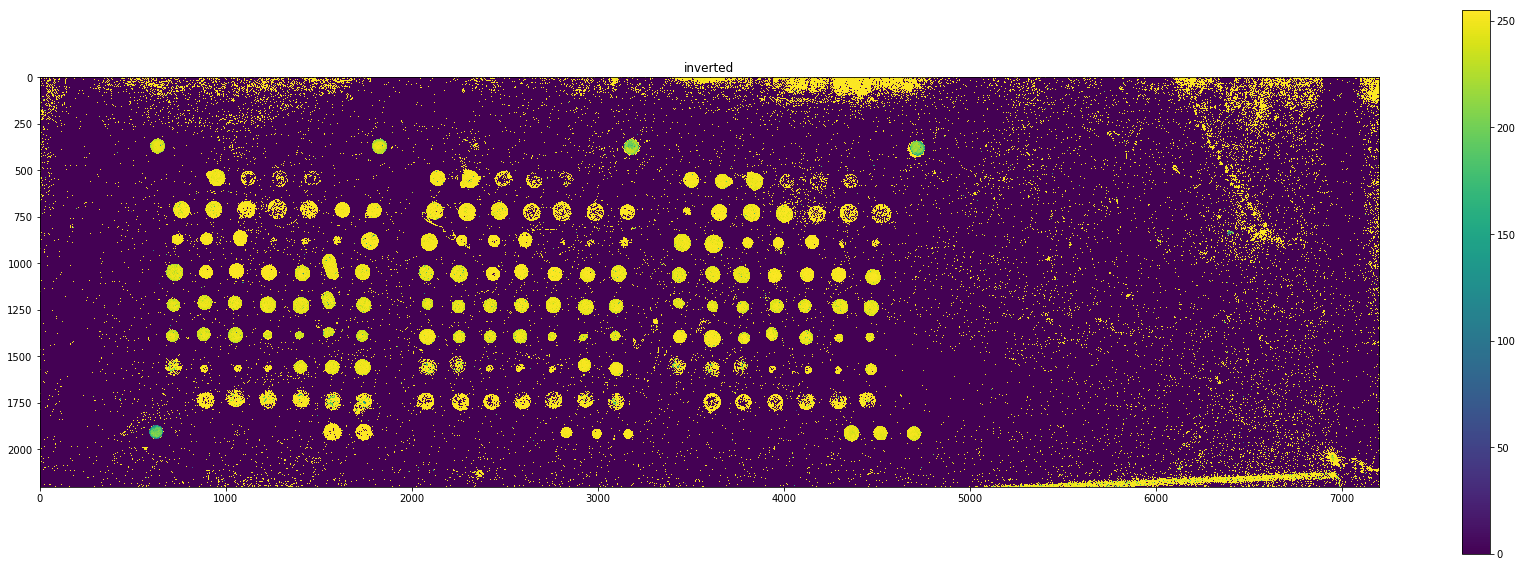

In [3]:
image2numeric.draw_imag(-ana.imag.T,"inverted")


--------------------------------------------------------------------------------
Loading data corresponding to data_id: <2017-05-19_N9_X31> in dir <../data/2017-05-19_N9_X31>
--------------------------------------------------------------------------------
Virus .gal:../data/2017-05-19_N9_X31/2017-05-19_N9_X31_vir.gal
Peptide .gal :../data/2017-05-19_N9_X31/2017-05-19_N9_X31_pep.gal
Meta  :../data/2017-05-19_N9_X31/2017-05-19_N9_X31.meta
Image file  :../data/2017-05-19_N9_X31/2017-05-19_N9_X31_600_100_635.tif
Spot intensities for the data ID (2017-05-19_N9_X31) are not averaged but primary values


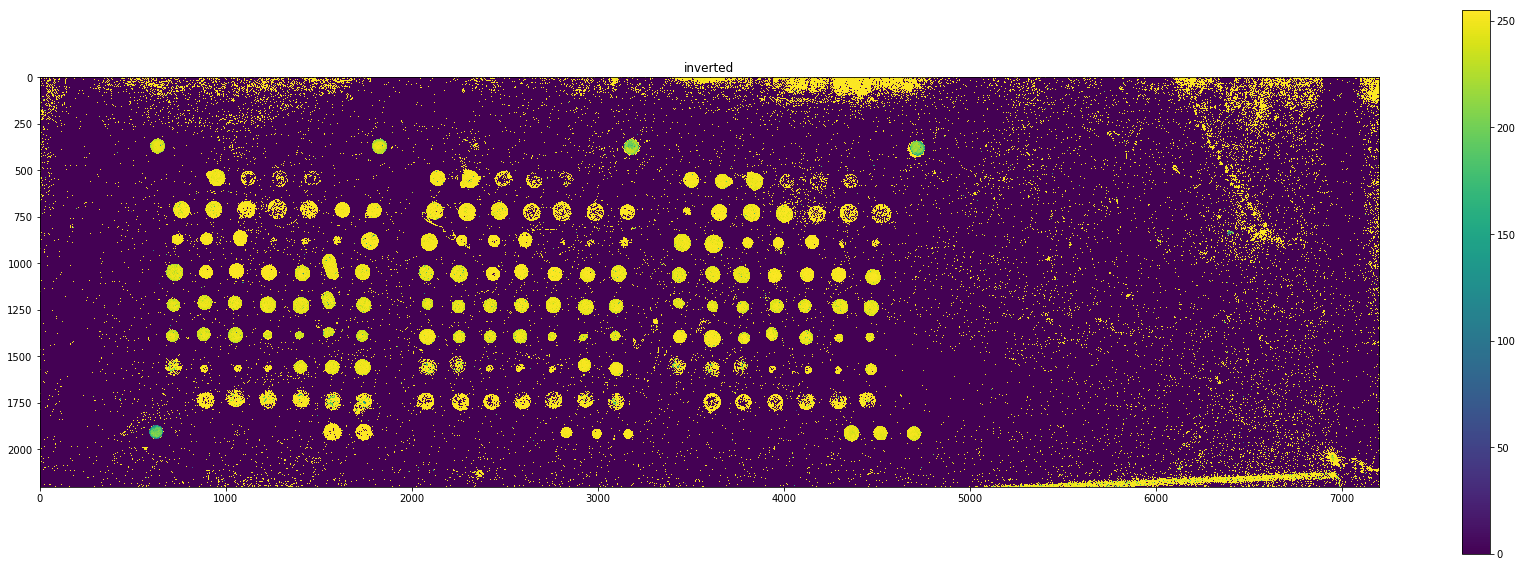

In [4]:

data_id="2017-05-19_N9_X31" 
#data_id="2017-05-19_N10_Pan" 
#data_id="2017-05-19_N11_Cal" 






directory = os.path.join("../data",data_id)
data = utils.load_data(data_id,directory,what="image2numeric")
ana=image2numeric.Image2numeric(data)
image2numeric.draw_imag(-ana.imag.T,"inverted")



In [5]:
dft = cv2.dft(np.float32(ana.imag.T),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


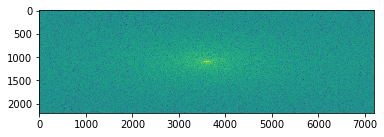

In [6]:
plt.imshow(magnitude_spectrum)
plt.show()

In [7]:
img=ana.imag.T
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

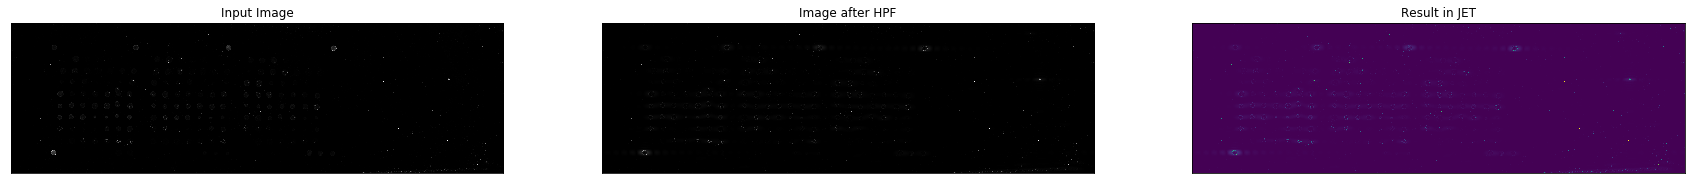

In [8]:
plt.subplots(figsize=(30, 10))

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()


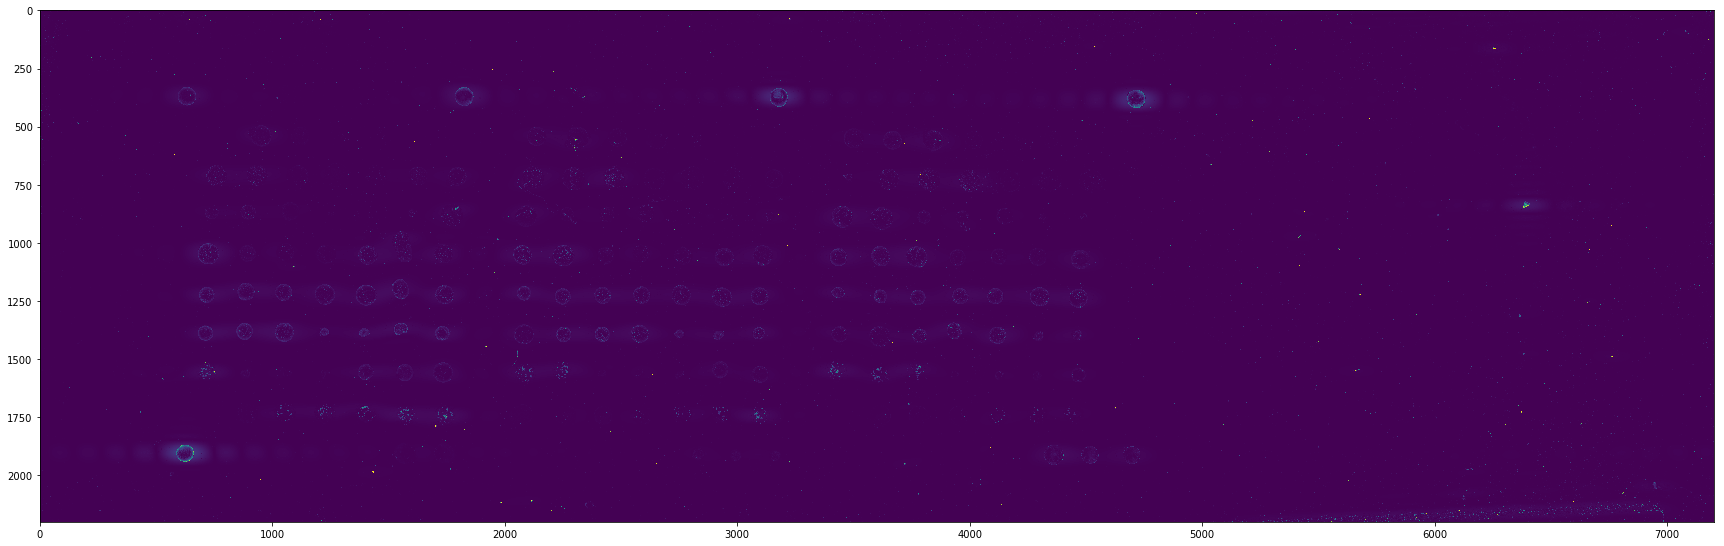

In [9]:
plt.subplots(figsize=(30, 10))
plt.imshow(img_back)
plt.show()


In [10]:
gridshape = (ana.spot["Row"].max(), ana.spot["Column"].max())
print(gridshape)

(25, 10)


In [3]:
imag = ana.imag 
imag

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=uint8)

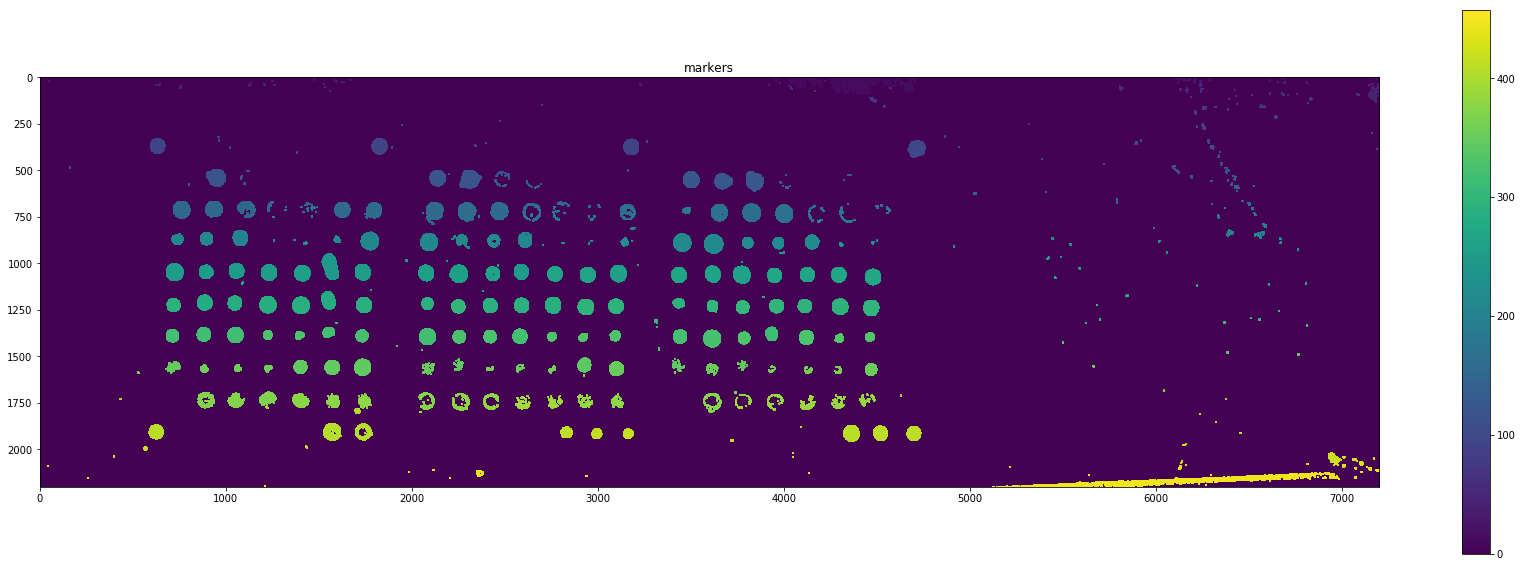

In [4]:
gray = imag.T

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(gray,cv2.MORPH_OPEN,kernel, iterations = 2)

#image2numeric.draw_imag(-gray,"inverted")
#image2numeric.draw_imag(opening,"noise removal",cmap="gray")
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
#image2numeric.draw_imag(sure_bg,"noise removal",cmap="gray")
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
#image2numeric.draw_imag(sure_fg,"noise removal",cmap="gray")
#unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_bg)

# Add one to all labels so that sure background is not 0, but 1
image2numeric.draw_imag(markers,"markers")



In [15]:
points_x = []
points_y = []
pointlist=[]
for marker in range(markers.max()):
    point= np.array(np.where(markers == marker))
    pointlist.append(len(point[0]))
    if 5*10**3 < len(point[0]) < 10**5:
        if 0.3 < image2numeric.spot_quality_shape(point[0],point[1]) < 3.0: 
            points_x.append(point[0].mean())
            points_y.append(point[1].mean())

gridshape = (ana.spot["Row"].max(), ana.spot["Column"].max())
    
    
    
    

In [16]:
print(gridshape)

(25, 10)


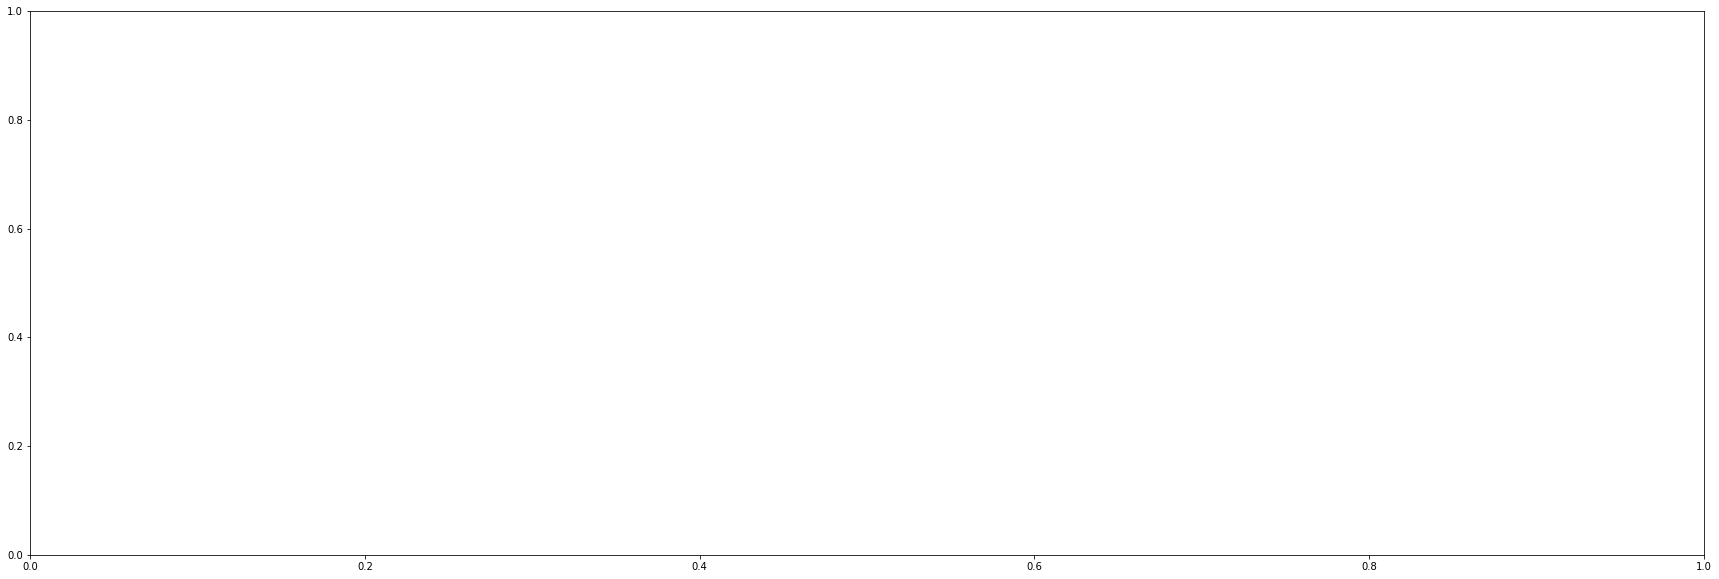

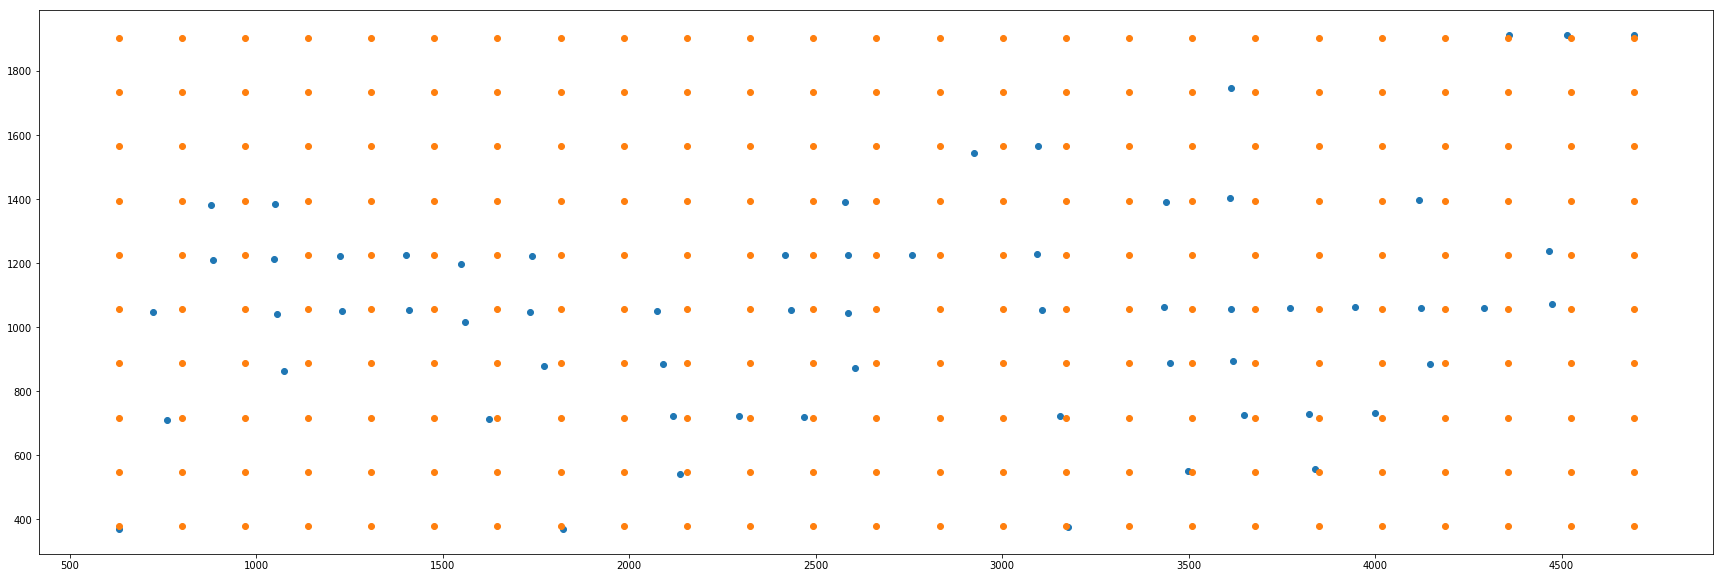

In [22]:
#image2numeric.draw_imag(gray,"new")
plt.subplots(figsize=(30, 10))

#plt.imshow(markers)
points_y=np.array(points_y)
points_x = np.array(points_x)

pitch = (points_y.max()-points_y.min())/(ana.spot["Row"].max()-1)

shape = (ana.spot["Row"].max(), ana.spot["Column"].max())

center_x = points_x.min()+0.5*(points_x.max()-points_x.min())
center_y = points_y.min()+0.5*(points_y.max()-points_y.min())
rotation = 0

X,Y = image2numeric.get_grid(shape, pitch, center_x, center_y, rotation)

plt.scatter(points_y,points_x)
plt.scatter(Y,X)
#estimate grid parameters 

#find closest
plt.show()


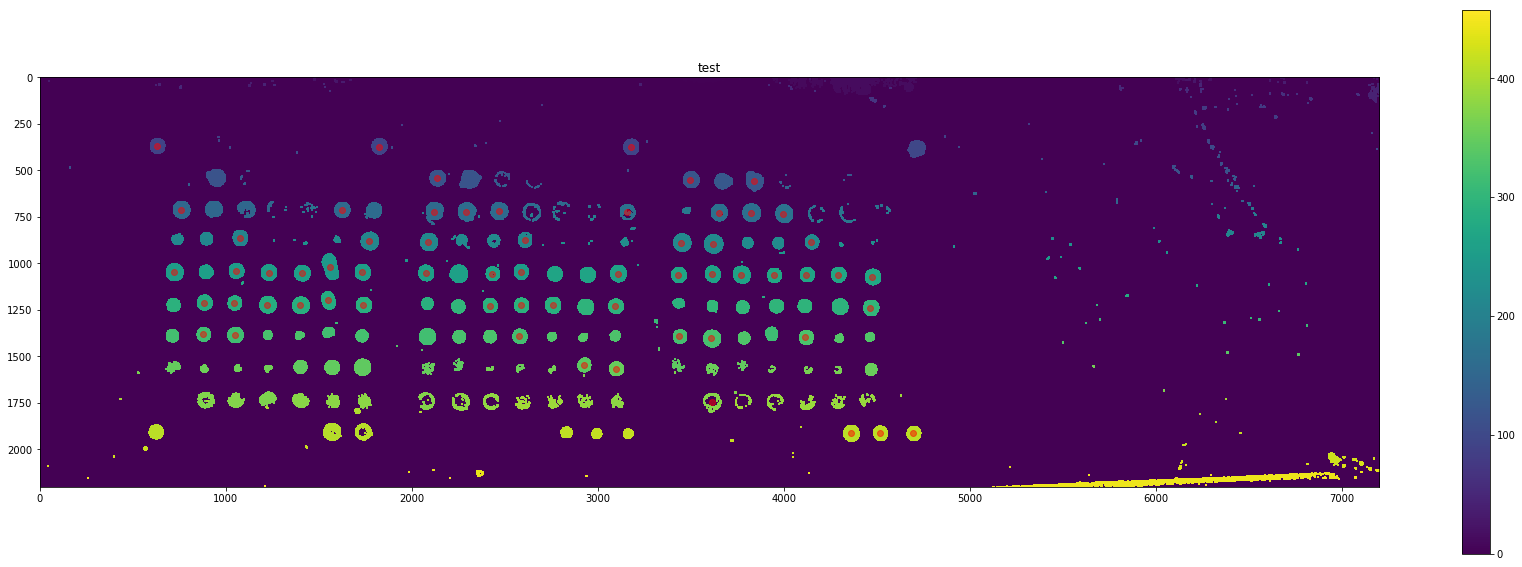

In [18]:
image2numeric.draw_grid(markers,points_y,points_x,"test")

In [ ]:
cmap = plt.get_cmap('jet')
max_c=kmeans.labels_.max()
plt.plot(points_x, c= kmeans.labels_)
plt.show()



In [ ]:
kmeans = KMeans(n_clusters=ana.spot["Column"].max()).fit(np.array(points_x).reshape(-1,1))
#print(ana.spot["Column"].max())

print kmeans.labels_

In [ ]:
plt.semilogy(pointlist)
plt.show()

In [ ]:
#image2numeric.draw_imag(gray,"new")
plt.subplots(figsize=(30, 10))
plt.scatter(points_y,points_x)
plt.imshow(markers)
plt.show()

In [ ]:
x = np.fft.fft2(np.array([points_x,points_y]))
print (x.shape)
#plt.xscale('log')
#plt.yscale('log')
plt.scatter(x[0,:20],x[1,:20])

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
x=np.array(points_x).reshape(-1,1)

db = DBSCAN(eps=20 ).fit(x)

labels = db.labels_
print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)


In [ ]:
plt.subplots(figsize=(30, 10))

plt.scatter(points_y,points_x,c=labels)
#plt.imshow(markers)
plt.show()

In [ ]:
# Black removed and is used for noise instead.
X=np.array(points_x).reshape(-1,1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy, 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy, 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:

# estimated pitch on image
self.pitch = (spot_position["x"].max() - spot_position["x"].min()) / (
Peptides["Column"].iloc[nonzero_ids].max() - Peptides["Column"].iloc[nonzero_ids].min())
# estimated center x on image
center_x = spot_position["x"].min() + 0.5 * (spot_position["x"].max() - spot_position["x"].min())
# estimated center y on image 
center_y = spot_position["y"].min() + 0.5 * (spot_position["y"].max() - spot_position["y"].min())
# gridshape
gridshape = (ana.spot["Row"].max(), ana.spot["Column"].max())

In [ ]:
from scipy.interpolate import RegularGridInterpolator
def f(x,y):
    return 2 * x**3 + 3 * y**2 
x = np.linspace(1, 10, 10)
y = np.linspace(1, 25, 25)
data = f(*np.meshgrid(x, y , indexing='ij', sparse=True))
np.meshgrid(x, y, indexing='ij', sparse=True)

In [ ]:
plt.scatter(x,y)